In [1]:
from qiskit_aer import AerSimulator
from qiskit import *
import supermarq , os
from qiskit.providers.fake_provider import *
import numpy as np
emulator_aer_dm = Aer.get_backend('aer_simulator_density_matrix')

In [2]:
all_fakes=[FakeAlmadenV2,FakeArmonkV2,FakeAthensV2,FakeAuckland,FakeBelemV2,FakeBoeblingenV2,FakeBogotaV2,FakeBrooklynV2,FakeBurlingtonV2,FakeCairoV2,FakeCambridgeV2,FakeCasablancaV2,FakeEssexV2,FakeGeneva,FakeGuadalupeV2,FakeHanoiV2,FakeJakartaV2,FakeJohannesburgV2,FakeKolkataV2,FakeLagosV2,FakeLimaV2,FakeLondonV2,FakeManhattanV2,FakeManilaV2,FakeMelbourneV2,FakeMontrealV2,FakeMumbaiV2,FakeNairobiV2,FakeOslo,FakeOurenseV2,FakeParisV2,FakePerth,FakePrague,FakePoughkeepsieV2,FakeQuitoV2,FakeRochesterV2,FakeRomeV2,FakeSantiagoV2,FakeSherbrooke,FakeSingaporeV2,FakeSydneyV2,FakeTorontoV2,FakeValenciaV2,FakeVigoV2,FakeWashingtonV2,FakeYorktownV2]
import random; selected_fakes = random.sample(all_fakes, 5)
selected_fakes

[qiskit.providers.fake_provider.backends.melbourne.fake_melbourne.FakeMelbourneV2,
 qiskit.providers.fake_provider.backends.mumbai.fake_mumbai.FakeMumbaiV2,
 qiskit.providers.fake_provider.backends.toronto.fake_toronto.FakeTorontoV2,
 qiskit.providers.fake_provider.backends.singapore.fake_singapore.FakeSingaporeV2,
 qiskit.providers.fake_provider.backends.rochester.fake_rochester.FakeRochesterV2]

In [3]:
benchmarks = [
    (supermarq.bit_code.BitCode(3, 3, [1, 0, 1]), "bitcode3"),
    (supermarq.ghz.GHZ(3), "ghz3"),
    (supermarq.hamiltonian_simulation.HamiltonianSimulation(3), "hsim3"),
    (supermarq.mermin_bell.MerminBell(3), "marmin_bell_3"),
    (supermarq.qaoa_fermionic_swap_proxy.QAOAFermionicSwapProxy(3), "qaoa_swap_proxy3"),
    (supermarq.qaoa_vanilla_proxy.QAOAVanillaProxy(3), "qaoa_vanilla_proxy3"),]  

for i in benchmarks:
    circuit=i[0].qiskit_circuit()
    print("\n------------------------------",i[1],"-----------------------------")
    #print(circuit.draw())


------------------------------ bitcode3 -----------------------------

------------------------------ ghz3 -----------------------------

------------------------------ hsim3 -----------------------------

------------------------------ marmin_bell_3 -----------------------------

------------------------------ qaoa_swap_proxy3 -----------------------------

------------------------------ qaoa_vanilla_proxy3 -----------------------------


In [4]:
benchmark_features = {}
for benchmark, label in benchmarks:
    benchmark_features[label] = [
        supermarq.converters.compute_communication_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_depth_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_entanglement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_liveness_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_measurement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_parallelism_with_qiskit(benchmark.qiskit_circuit()),]
print(benchmark_features)

{'bitcode3': [0.4, 0.5, 0.8571428571428571, 0.6142857142857143, 0.46153846153846156, 0.0], 'ghz3': [0.6666666666666666, 1.0, 0.6666666666666666, 0.6666666666666666, 0.0, 0], 'hsim3': [0.6666666666666666, 1.0, 0.26666666666666666, 0.7333333333333333, 0.0, 0.25], 'marmin_bell_3': [1.0, 1.0, 0.4375, 0.6666666666666666, 0.0, 0.11538461538461542], 'qaoa_swap_proxy3': [0.6666666666666666, 1.0, 0.5, 0.6666666666666666, 0.0, 0.09999999999999998], 'qaoa_vanilla_proxy3': [1.0, 1.0, 0.4, 0.6666666666666666, 0.0, 0.125]}


In [41]:
jobs =[]
for backend in selected_fakes:
    fake=backend
    for benchmark, label in benchmarks:
        circuit=benchmark.qiskit_circuit()
        job = fake().run(circuit, shots=1000)
        result=job.result()
        counts = job.result(0).get_counts()
        score = benchmark.score(counts)
        print(score)
        #counts=job.result(0).count()
        jobs.append((label,benchmark,fake,job,score))
#jobs

0.0
0.8582277431460975
0.924446609406726
0.489
0.8400014633087527
0.8920000317199632
0.0
0.9028535199818429
0.9421132760733926
0.482
0.8146680209445711
0.902000032529146
0.0
0.7796640479176754
0.8307799427400593
0.483
0.6900008177313618
0.8140000254083378
0.0
0.8748968449817626
0.925446609406726
0.491
0.8346681070215566
0.884000031072617
1.9721522630525295e-31
0.5202420575501809
0.7911132760733925
0.4235
0.6020004389926259
0.6920000155363085


In [73]:
def cut(j):
    l= str(j)
    import re; parts = l.split(".")
    j=parts[5]
    return j

all_scores={}   
for i in selected_fakes:
    fakes=i
    #print("SELCETED_FAKES:: ",i)
    i={}
    for label,benchmark,backend,job,score in jobs:
        #supermarq.plotting.plot_results([score], [label])
        if fakes == backend:
            i[label] = score
    device_scores = 'device_score_' +str(cut(fakes))
    all_scores[device_scores]= i
print(all_scores)

-------------
-------------
-------------
-------------
-------------
{'device_score_fake_melbourne': {'bitcode3': 0.0, 'ghz3': 0.8582277431460975, 'hsim3': 0.924446609406726, 'marmin_bell_3': 0.489, 'qaoa_swap_proxy3': 0.8400014633087527, 'qaoa_vanilla_proxy3': 0.8920000317199632}, 'device_score_fake_mumbai': {'bitcode3': 0.0, 'ghz3': 0.9028535199818429, 'hsim3': 0.9421132760733926, 'marmin_bell_3': 0.482, 'qaoa_swap_proxy3': 0.8146680209445711, 'qaoa_vanilla_proxy3': 0.902000032529146}, 'device_score_fake_toronto': {'bitcode3': 0.0, 'ghz3': 0.7796640479176754, 'hsim3': 0.8307799427400593, 'marmin_bell_3': 0.483, 'qaoa_swap_proxy3': 0.6900008177313618, 'qaoa_vanilla_proxy3': 0.8140000254083378}, 'device_score_fake_singapore': {'bitcode3': 0.0, 'ghz3': 0.8748968449817626, 'hsim3': 0.925446609406726, 'marmin_bell_3': 0.491, 'qaoa_swap_proxy3': 0.8346681070215566, 'qaoa_vanilla_proxy3': 0.884000031072617}, 'device_score_fake_rochester': {'bitcode3': 1.9721522630525295e-31, 'ghz3': 0.5202

USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.melbourne.fake_melbourne.FakeMelbourneV2'> CIRCUIT_NAME: bitcode3 COUNTS : {'111': 34, '011': 87, '001': 105, '101': 105, '010': 175, '000': 120, '100': 199, '110': 175} ; SCORE = 0.0


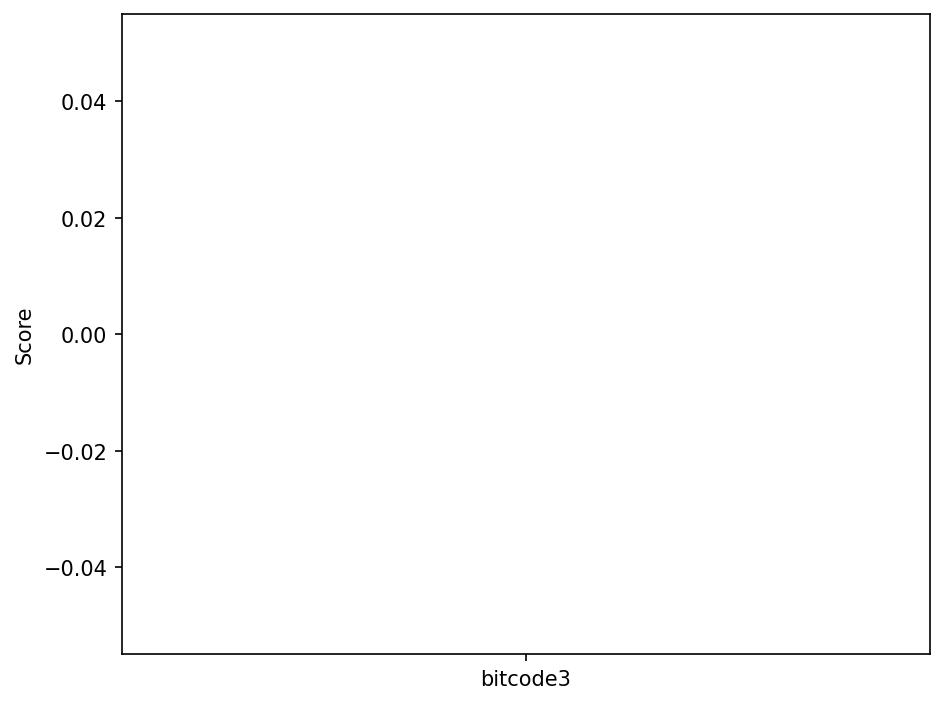

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.melbourne.fake_melbourne.FakeMelbourneV2'> CIRCUIT_NAME: ghz3 COUNTS : {'111': 34, '011': 87, '001': 105, '101': 105, '010': 175, '000': 120, '100': 199, '110': 175} ; SCORE = 0.8582277431460975


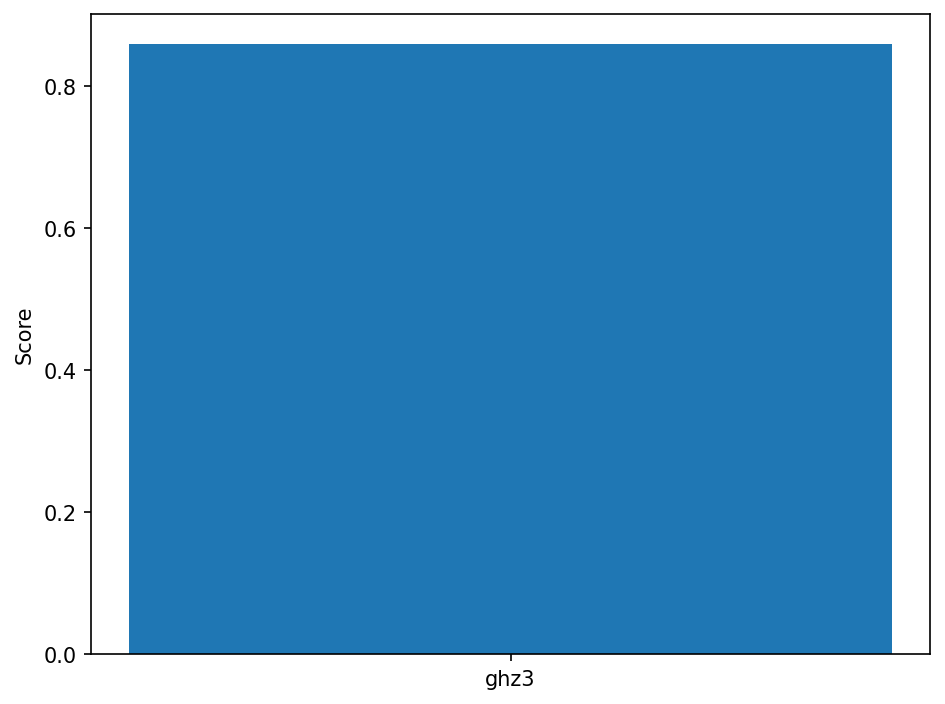

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.melbourne.fake_melbourne.FakeMelbourneV2'> CIRCUIT_NAME: hsim3 COUNTS : {'111': 34, '011': 87, '001': 105, '101': 105, '010': 175, '000': 120, '100': 199, '110': 175} ; SCORE = 0.924446609406726


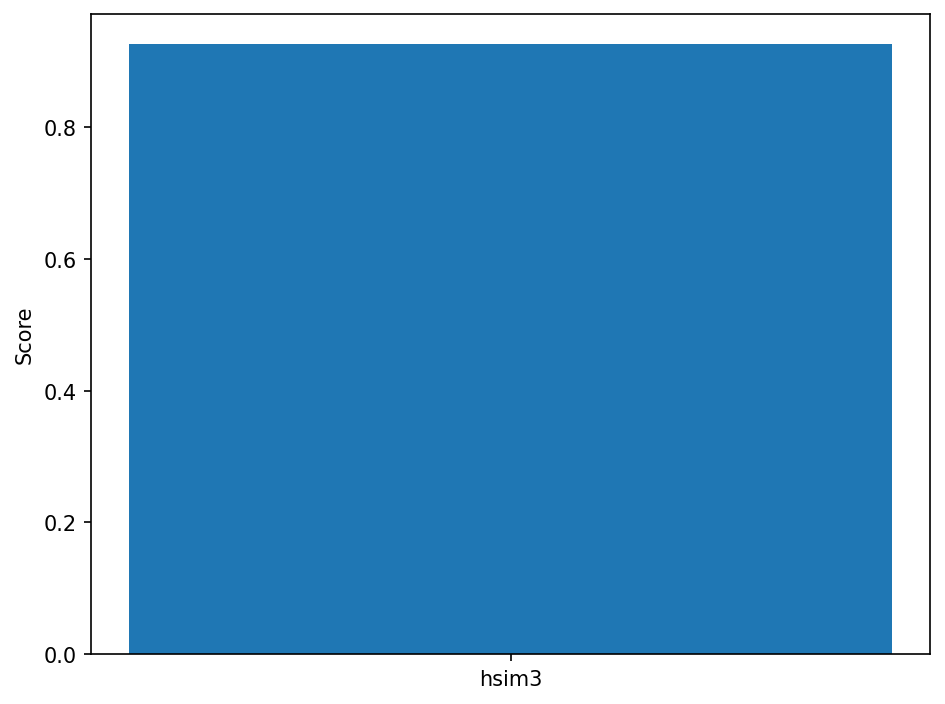

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.melbourne.fake_melbourne.FakeMelbourneV2'> CIRCUIT_NAME: marmin_bell_3 COUNTS : {'111': 34, '011': 87, '001': 105, '101': 105, '010': 175, '000': 120, '100': 199, '110': 175} ; SCORE = 0.489


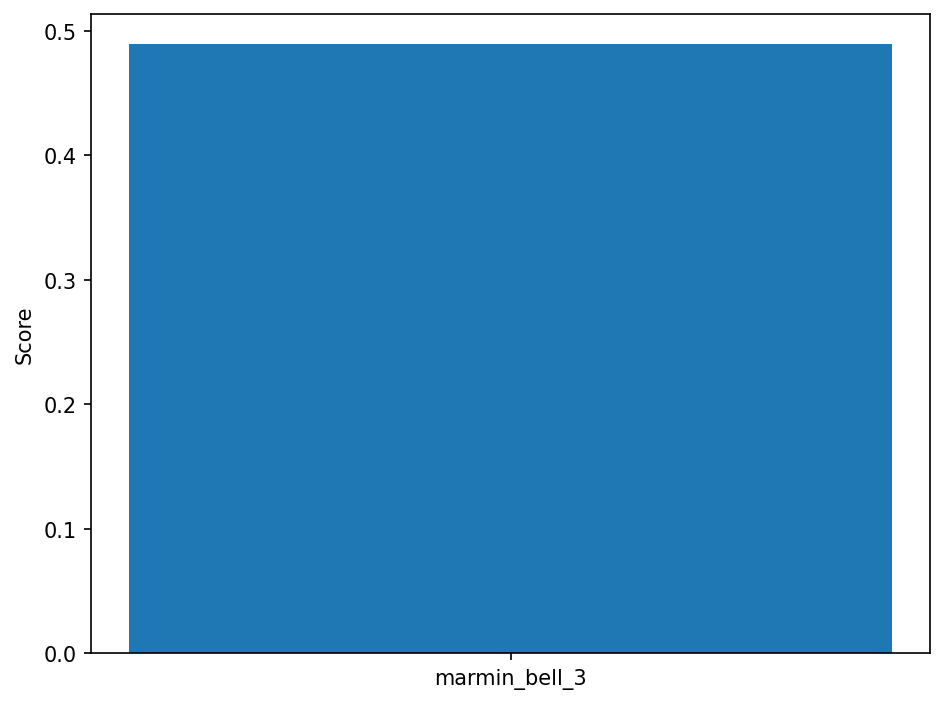

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.melbourne.fake_melbourne.FakeMelbourneV2'> CIRCUIT_NAME: qaoa_swap_proxy3 COUNTS : {'111': 34, '011': 87, '001': 105, '101': 105, '010': 175, '000': 120, '100': 199, '110': 175} ; SCORE = 0.8400014633087527


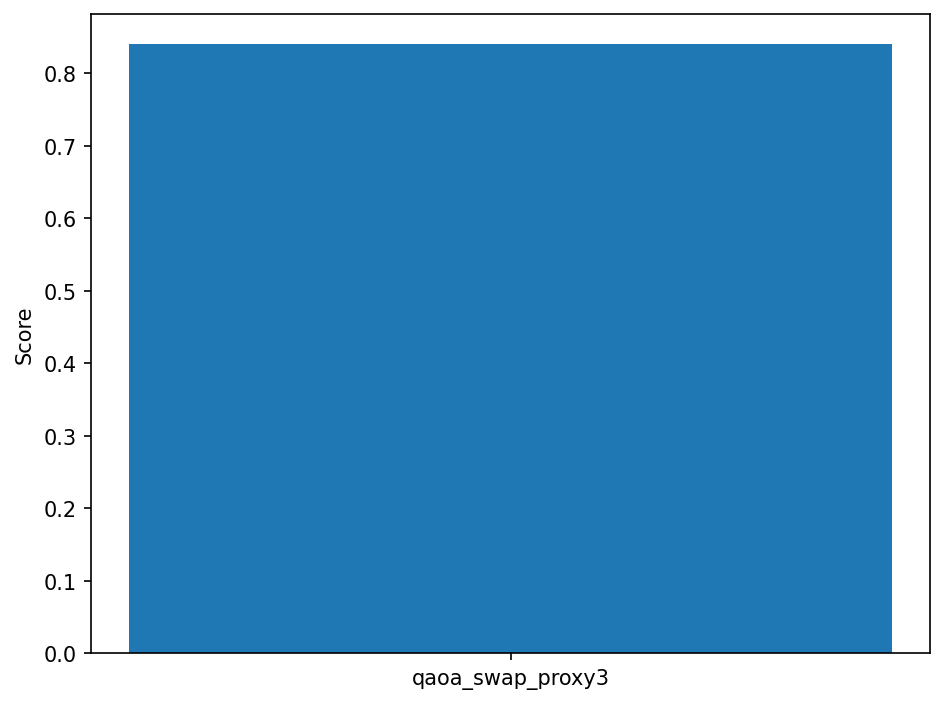

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.melbourne.fake_melbourne.FakeMelbourneV2'> CIRCUIT_NAME: qaoa_vanilla_proxy3 COUNTS : {'111': 34, '011': 87, '001': 105, '101': 105, '010': 175, '000': 120, '100': 199, '110': 175} ; SCORE = 0.8920000317199632


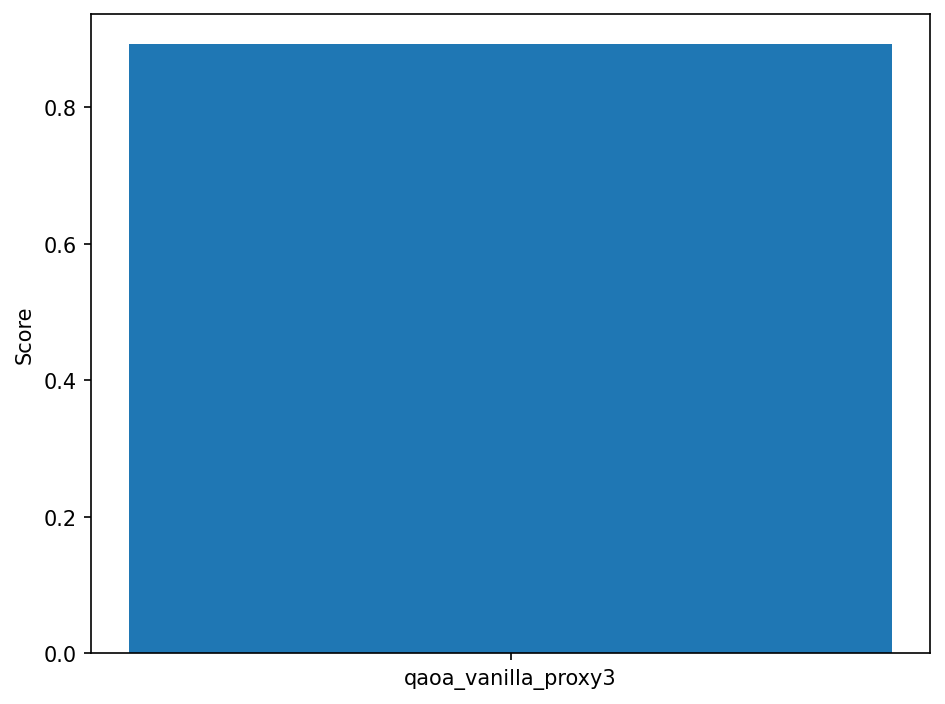

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.mumbai.fake_mumbai.FakeMumbaiV2'> CIRCUIT_NAME: bitcode3 COUNTS : {'111': 34, '011': 87, '001': 105, '101': 105, '010': 175, '000': 120, '100': 199, '110': 175} ; SCORE = 0.0


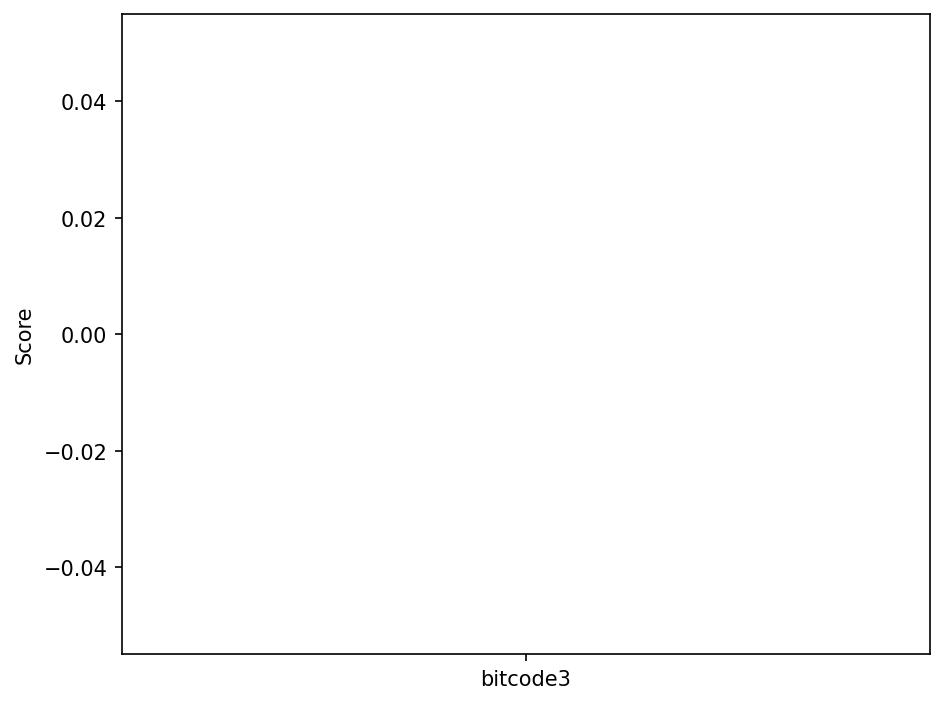

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.mumbai.fake_mumbai.FakeMumbaiV2'> CIRCUIT_NAME: ghz3 COUNTS : {'111': 34, '011': 87, '001': 105, '101': 105, '010': 175, '000': 120, '100': 199, '110': 175} ; SCORE = 0.9028535199818429


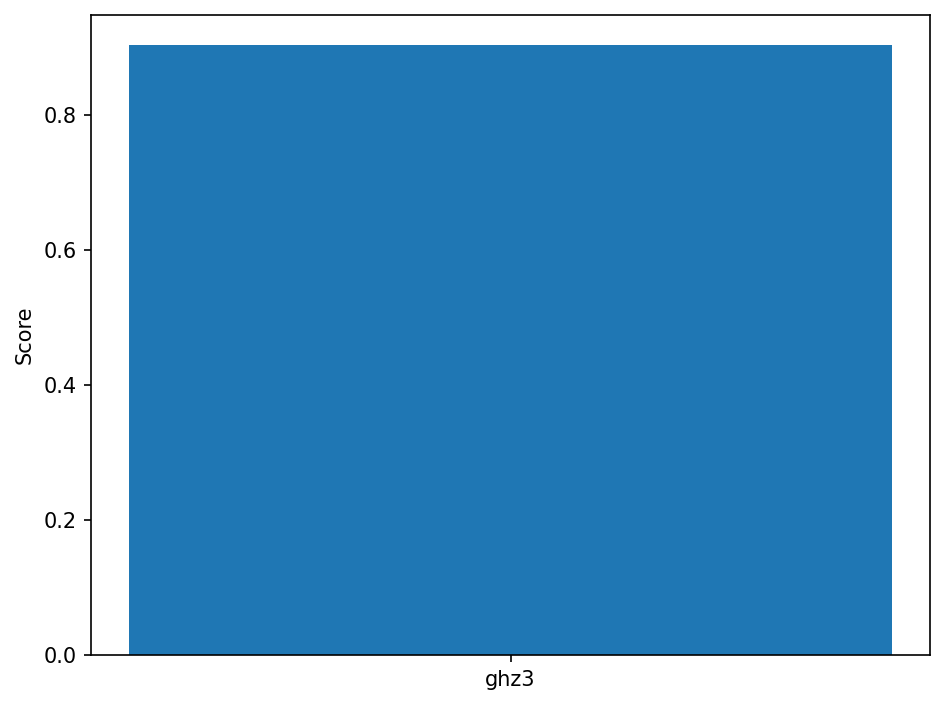

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.mumbai.fake_mumbai.FakeMumbaiV2'> CIRCUIT_NAME: hsim3 COUNTS : {'111': 34, '011': 87, '001': 105, '101': 105, '010': 175, '000': 120, '100': 199, '110': 175} ; SCORE = 0.9421132760733926


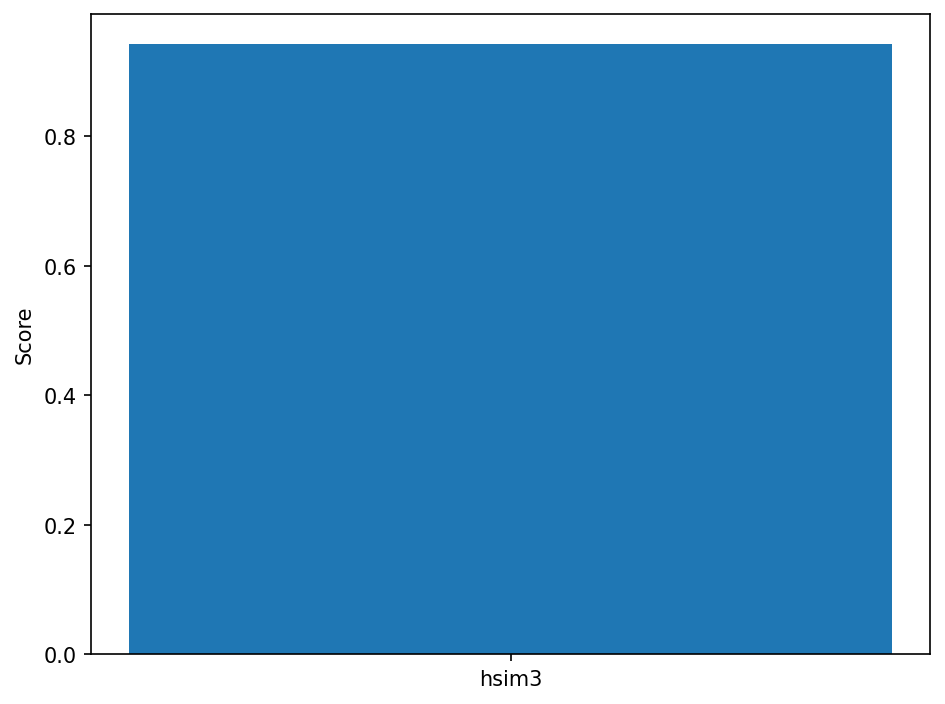

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.mumbai.fake_mumbai.FakeMumbaiV2'> CIRCUIT_NAME: marmin_bell_3 COUNTS : {'111': 34, '011': 87, '001': 105, '101': 105, '010': 175, '000': 120, '100': 199, '110': 175} ; SCORE = 0.482


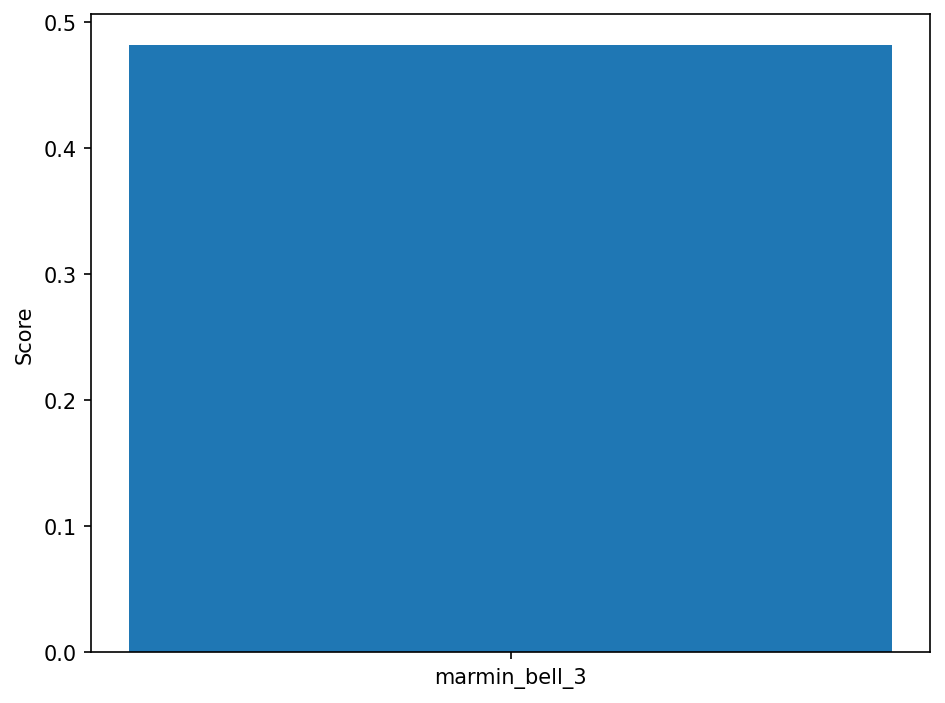

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.mumbai.fake_mumbai.FakeMumbaiV2'> CIRCUIT_NAME: qaoa_swap_proxy3 COUNTS : {'111': 34, '011': 87, '001': 105, '101': 105, '010': 175, '000': 120, '100': 199, '110': 175} ; SCORE = 0.8146680209445711


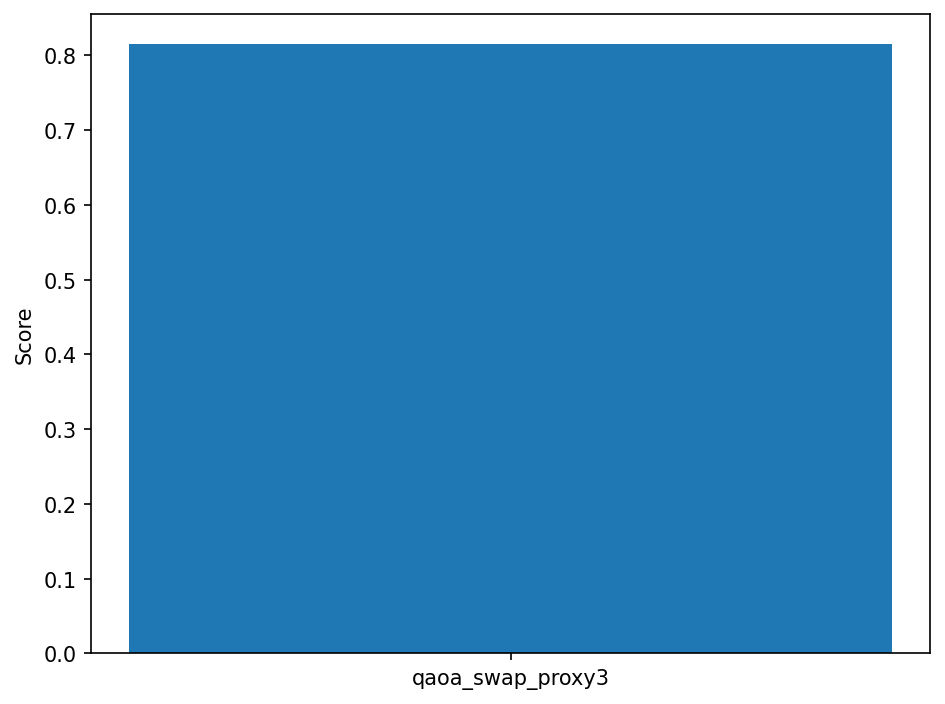

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.mumbai.fake_mumbai.FakeMumbaiV2'> CIRCUIT_NAME: qaoa_vanilla_proxy3 COUNTS : {'111': 34, '011': 87, '001': 105, '101': 105, '010': 175, '000': 120, '100': 199, '110': 175} ; SCORE = 0.902000032529146


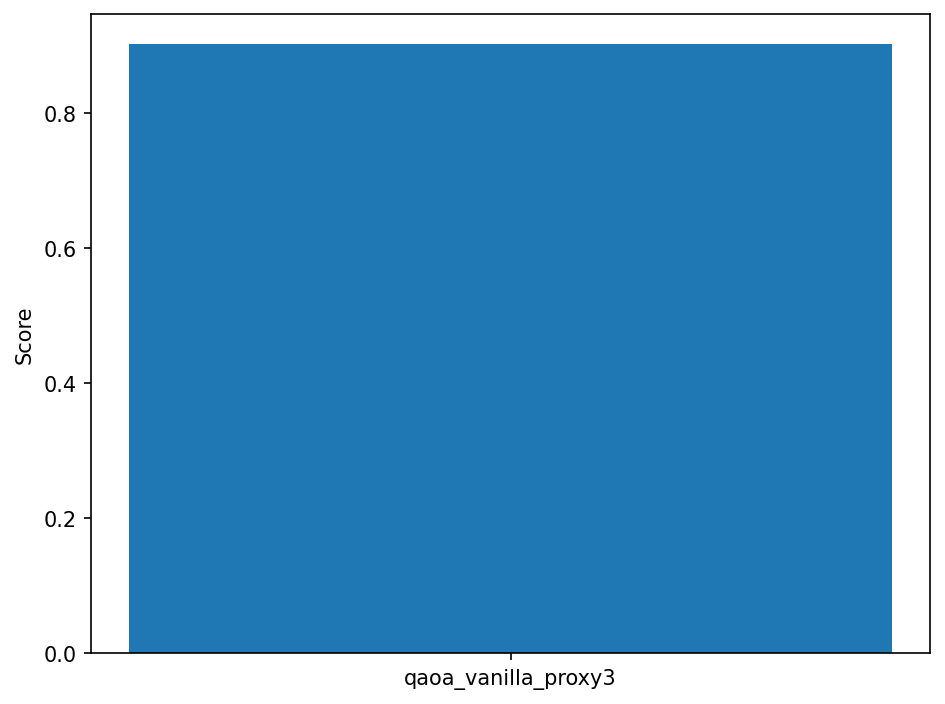

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.toronto.fake_toronto.FakeTorontoV2'> CIRCUIT_NAME: bitcode3 COUNTS : {'111': 34, '011': 87, '001': 105, '101': 105, '010': 175, '000': 120, '100': 199, '110': 175} ; SCORE = 0.0


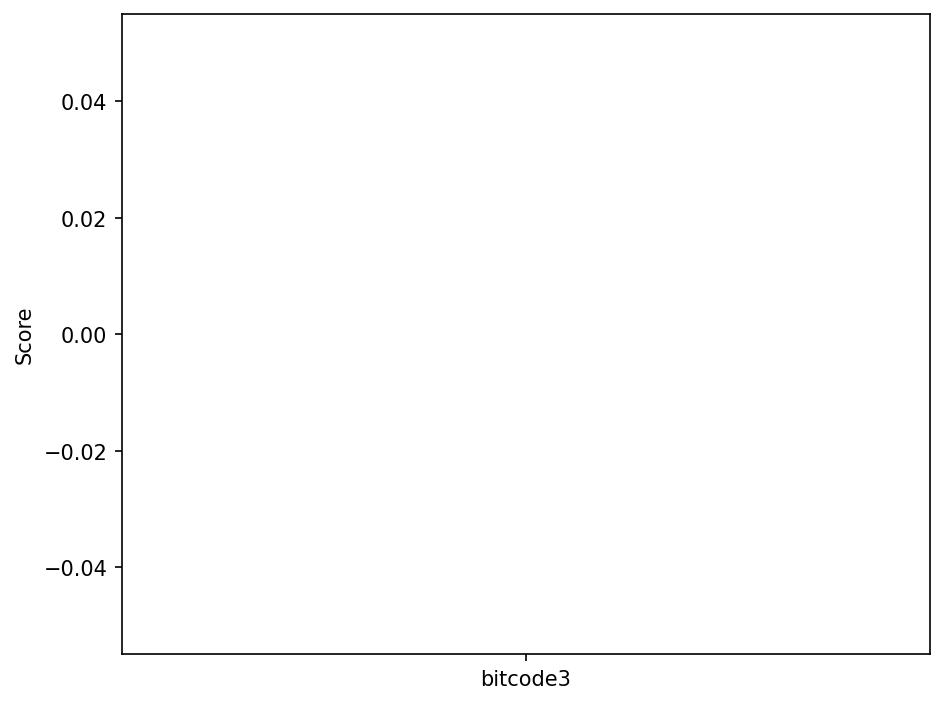

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.toronto.fake_toronto.FakeTorontoV2'> CIRCUIT_NAME: ghz3 COUNTS : {'111': 34, '011': 87, '001': 105, '101': 105, '010': 175, '000': 120, '100': 199, '110': 175} ; SCORE = 0.7796640479176754


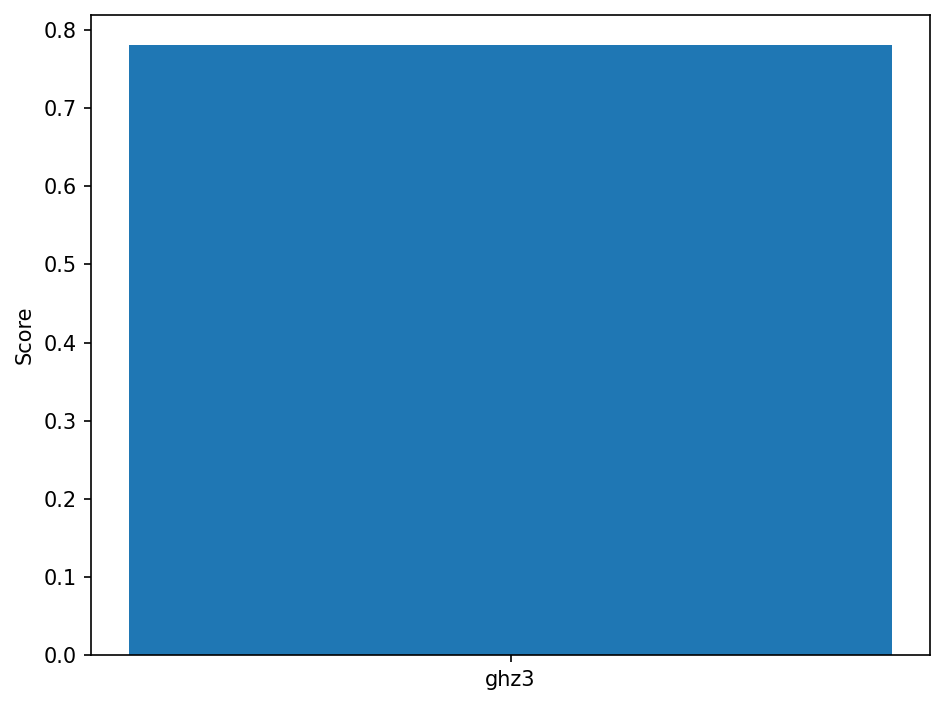

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.toronto.fake_toronto.FakeTorontoV2'> CIRCUIT_NAME: hsim3 COUNTS : {'111': 34, '011': 87, '001': 105, '101': 105, '010': 175, '000': 120, '100': 199, '110': 175} ; SCORE = 0.8307799427400593


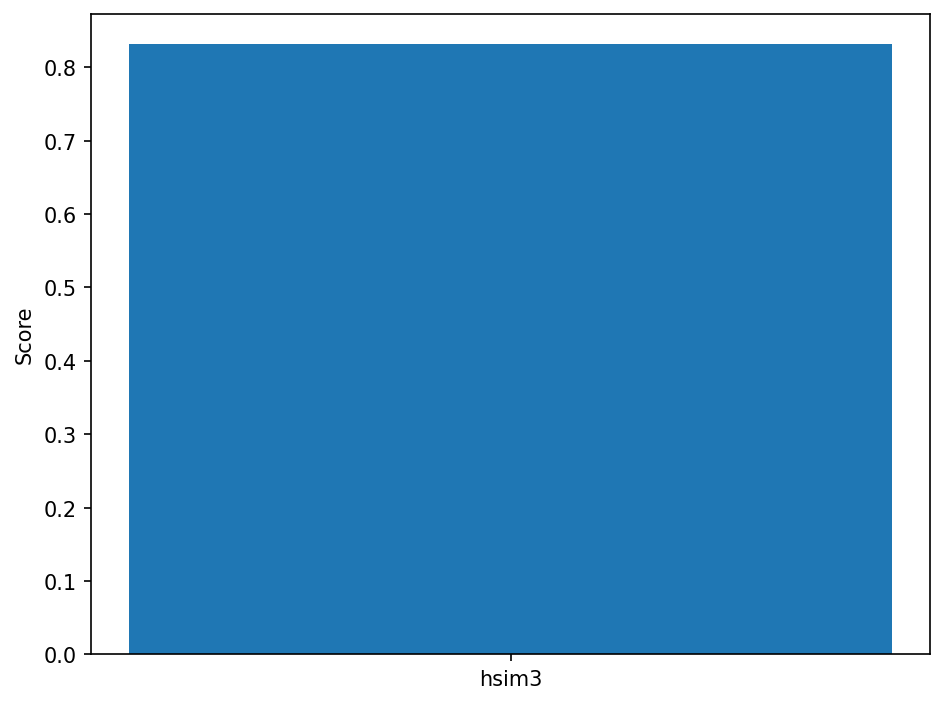

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.toronto.fake_toronto.FakeTorontoV2'> CIRCUIT_NAME: marmin_bell_3 COUNTS : {'111': 34, '011': 87, '001': 105, '101': 105, '010': 175, '000': 120, '100': 199, '110': 175} ; SCORE = 0.483


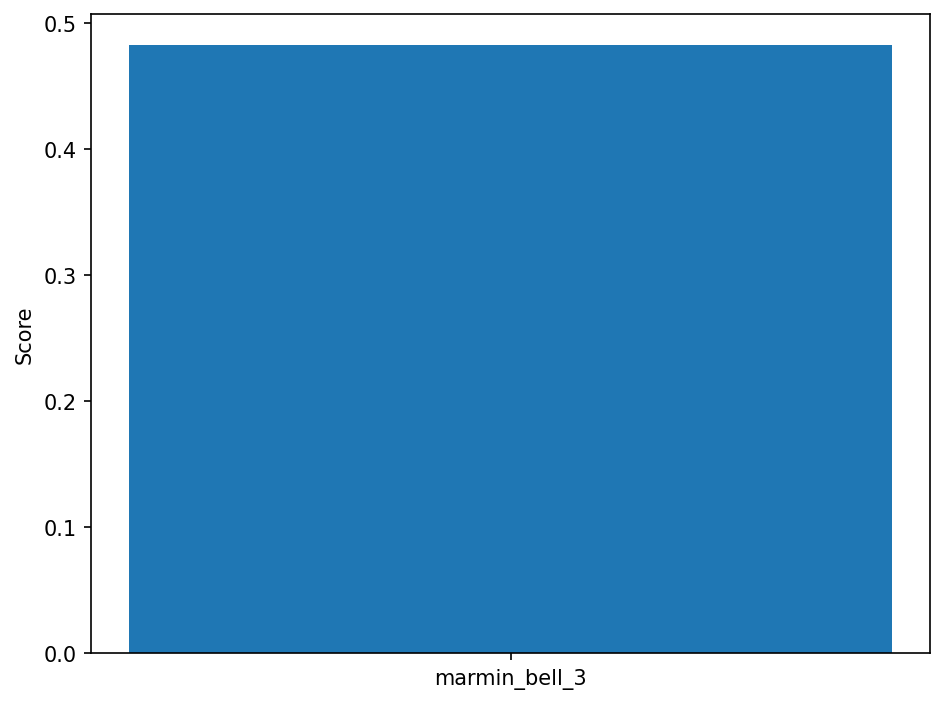

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.toronto.fake_toronto.FakeTorontoV2'> CIRCUIT_NAME: qaoa_swap_proxy3 COUNTS : {'111': 34, '011': 87, '001': 105, '101': 105, '010': 175, '000': 120, '100': 199, '110': 175} ; SCORE = 0.6900008177313618


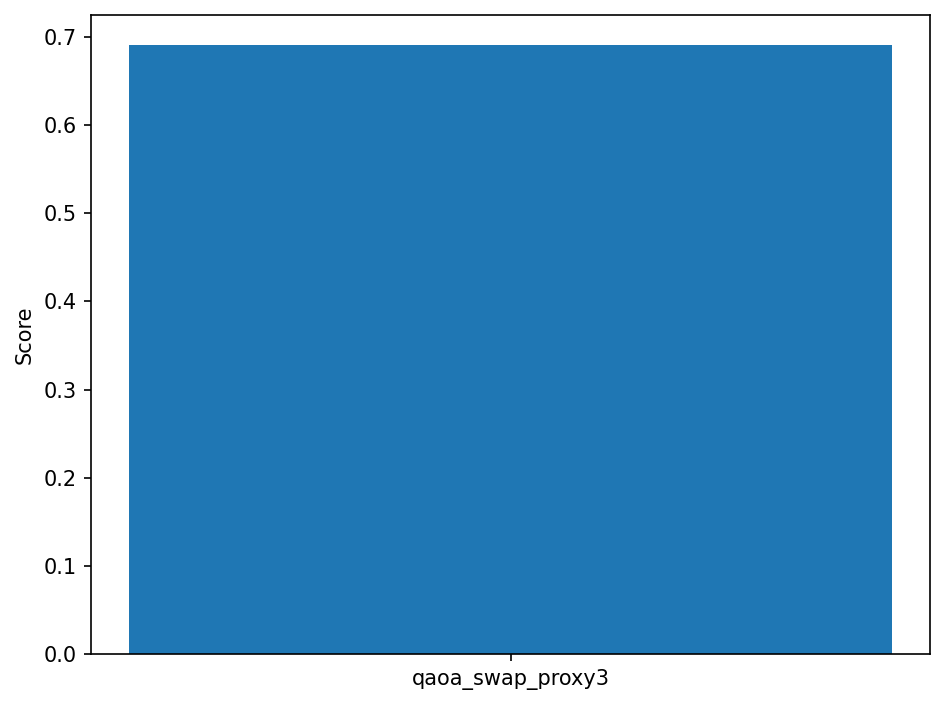

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.toronto.fake_toronto.FakeTorontoV2'> CIRCUIT_NAME: qaoa_vanilla_proxy3 COUNTS : {'111': 34, '011': 87, '001': 105, '101': 105, '010': 175, '000': 120, '100': 199, '110': 175} ; SCORE = 0.8140000254083378


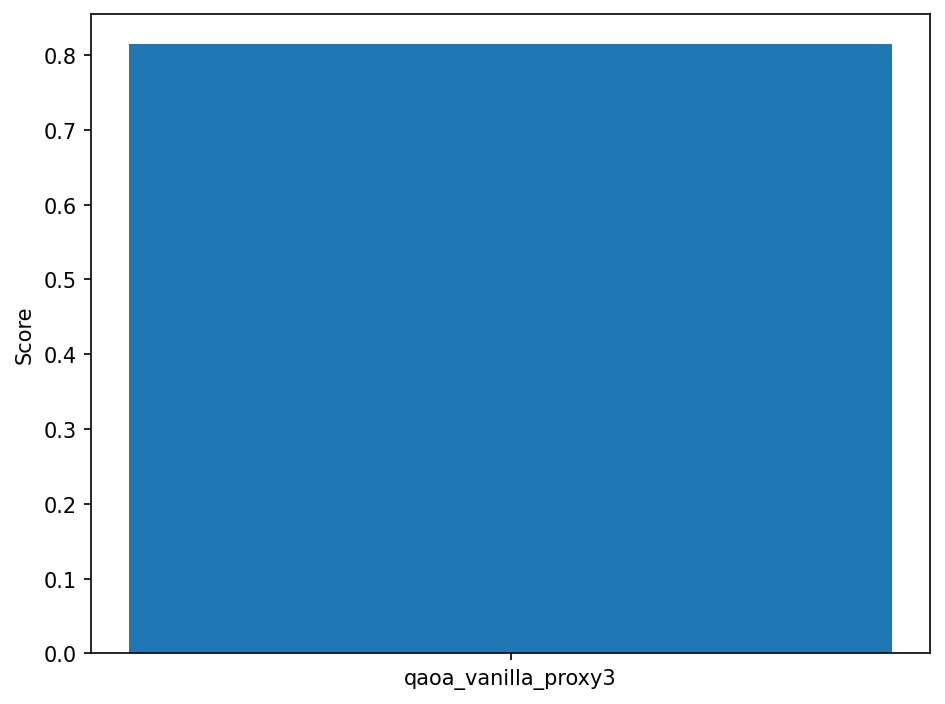

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.singapore.fake_singapore.FakeSingaporeV2'> CIRCUIT_NAME: bitcode3 COUNTS : {'111': 34, '011': 87, '001': 105, '101': 105, '010': 175, '000': 120, '100': 199, '110': 175} ; SCORE = 0.0


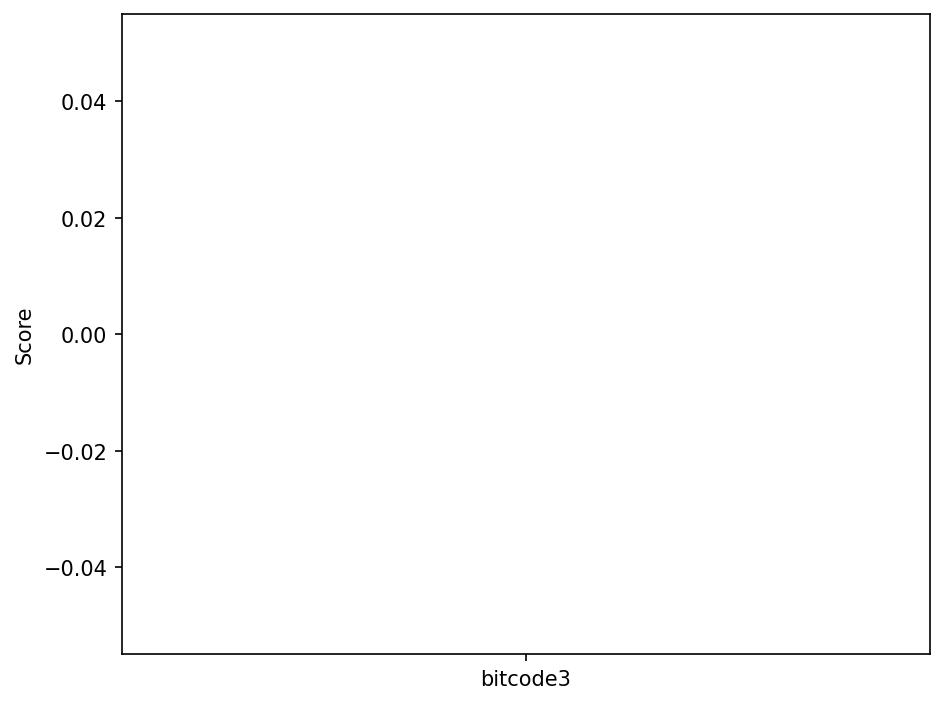

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.singapore.fake_singapore.FakeSingaporeV2'> CIRCUIT_NAME: ghz3 COUNTS : {'111': 34, '011': 87, '001': 105, '101': 105, '010': 175, '000': 120, '100': 199, '110': 175} ; SCORE = 0.8748968449817626


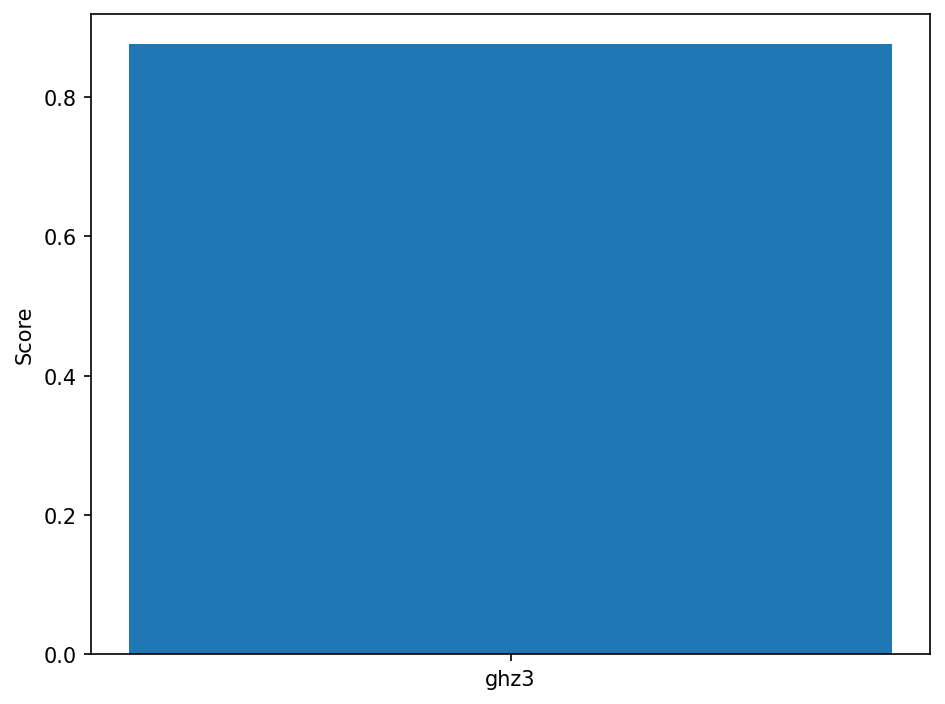

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.singapore.fake_singapore.FakeSingaporeV2'> CIRCUIT_NAME: hsim3 COUNTS : {'111': 34, '011': 87, '001': 105, '101': 105, '010': 175, '000': 120, '100': 199, '110': 175} ; SCORE = 0.925446609406726


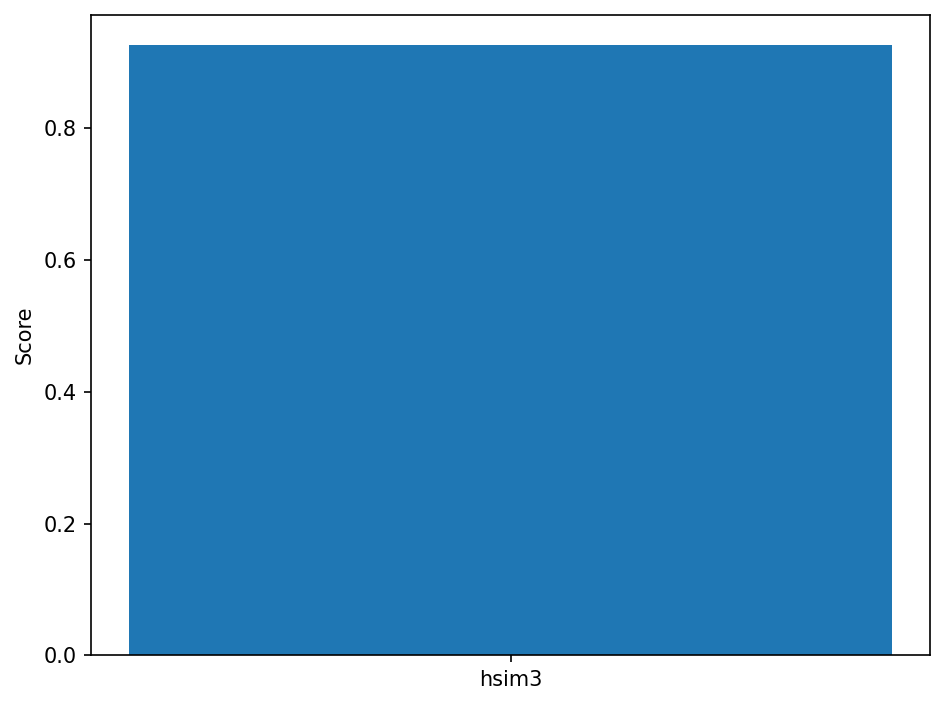

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.singapore.fake_singapore.FakeSingaporeV2'> CIRCUIT_NAME: marmin_bell_3 COUNTS : {'111': 34, '011': 87, '001': 105, '101': 105, '010': 175, '000': 120, '100': 199, '110': 175} ; SCORE = 0.491


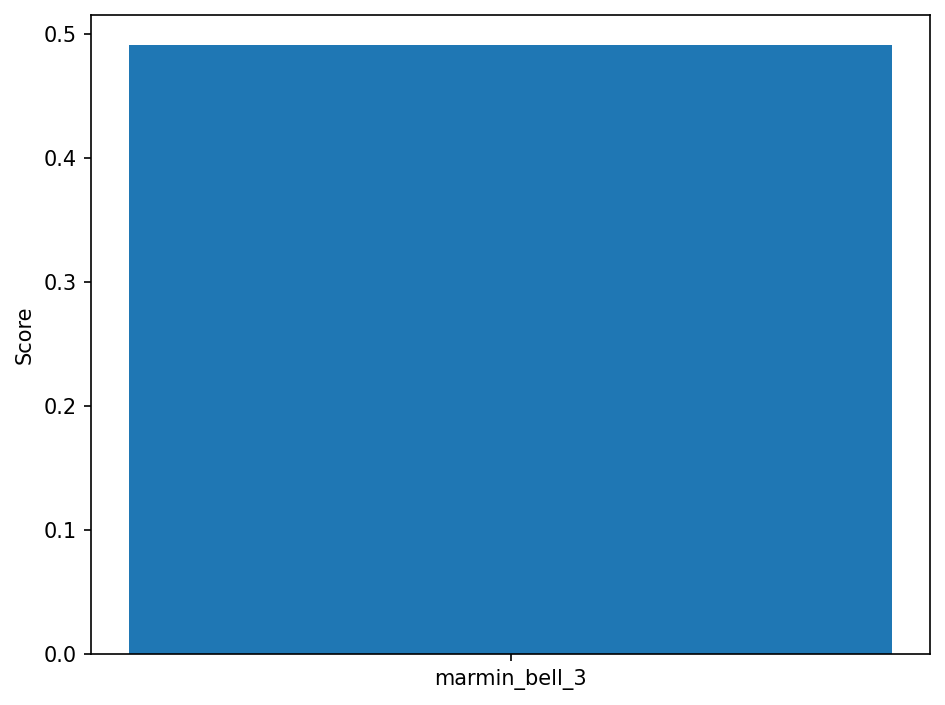

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.singapore.fake_singapore.FakeSingaporeV2'> CIRCUIT_NAME: qaoa_swap_proxy3 COUNTS : {'111': 34, '011': 87, '001': 105, '101': 105, '010': 175, '000': 120, '100': 199, '110': 175} ; SCORE = 0.8346681070215566


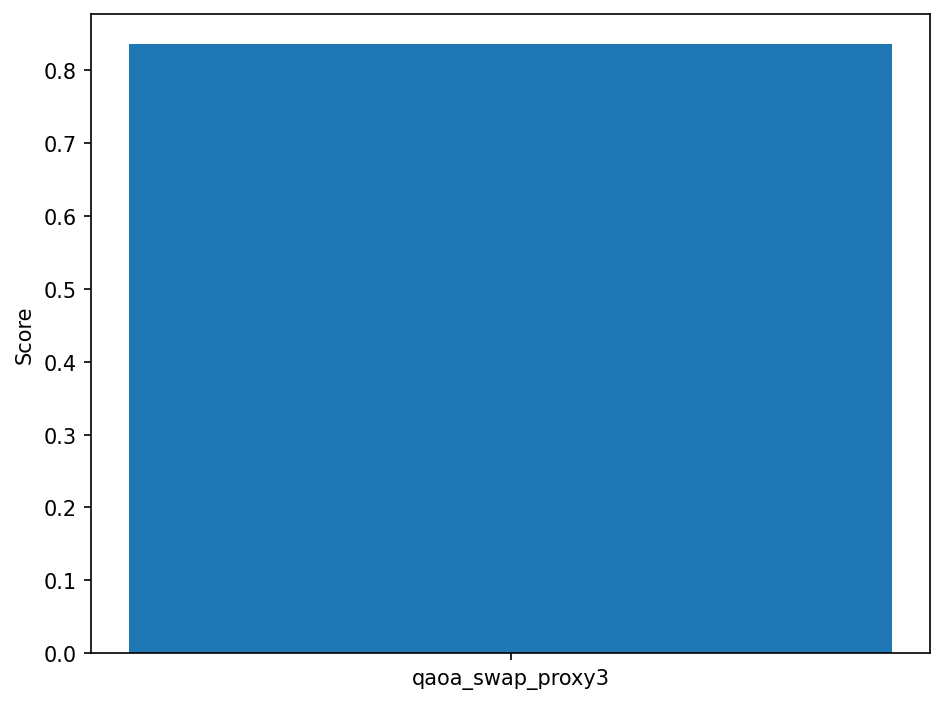

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.singapore.fake_singapore.FakeSingaporeV2'> CIRCUIT_NAME: qaoa_vanilla_proxy3 COUNTS : {'111': 34, '011': 87, '001': 105, '101': 105, '010': 175, '000': 120, '100': 199, '110': 175} ; SCORE = 0.884000031072617


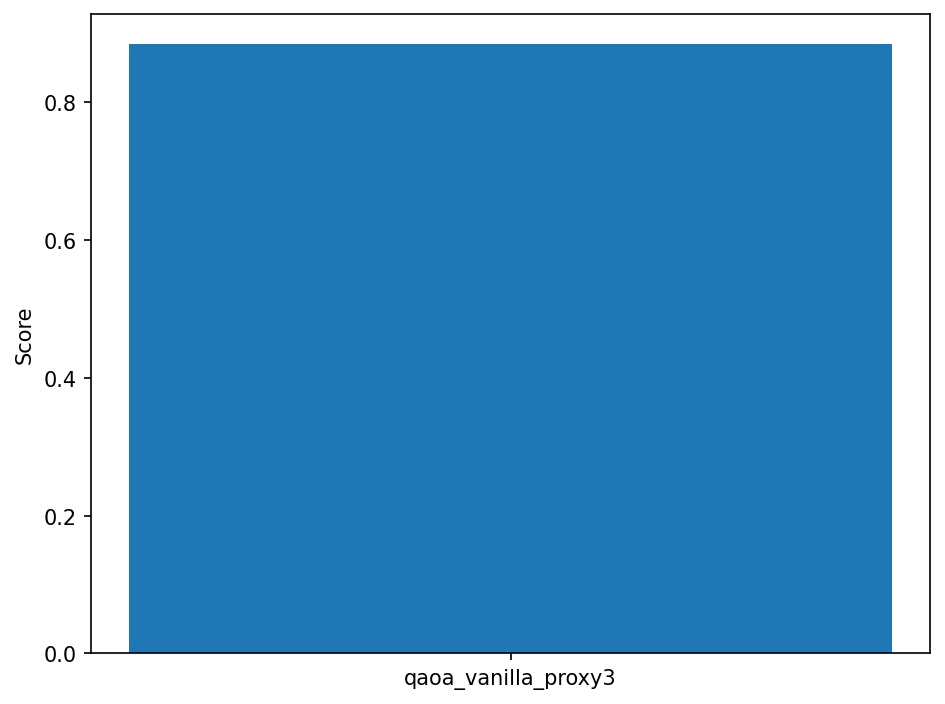

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.rochester.fake_rochester.FakeRochesterV2'> CIRCUIT_NAME: bitcode3 COUNTS : {'111': 34, '011': 87, '001': 105, '101': 105, '010': 175, '000': 120, '100': 199, '110': 175} ; SCORE = 1.9721522630525295e-31


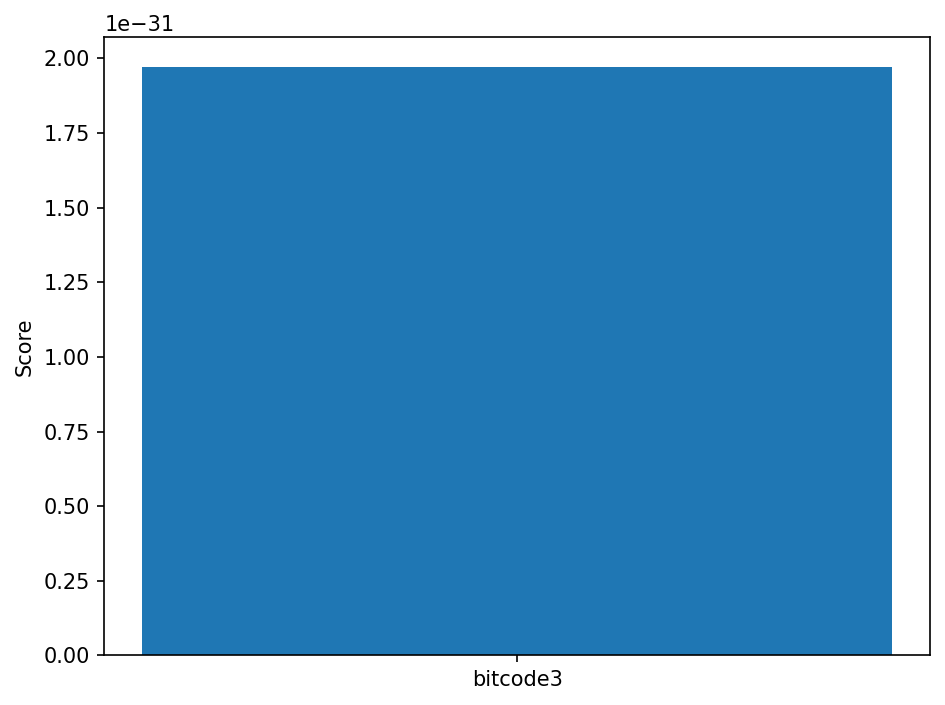

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.rochester.fake_rochester.FakeRochesterV2'> CIRCUIT_NAME: ghz3 COUNTS : {'111': 34, '011': 87, '001': 105, '101': 105, '010': 175, '000': 120, '100': 199, '110': 175} ; SCORE = 0.5202420575501809


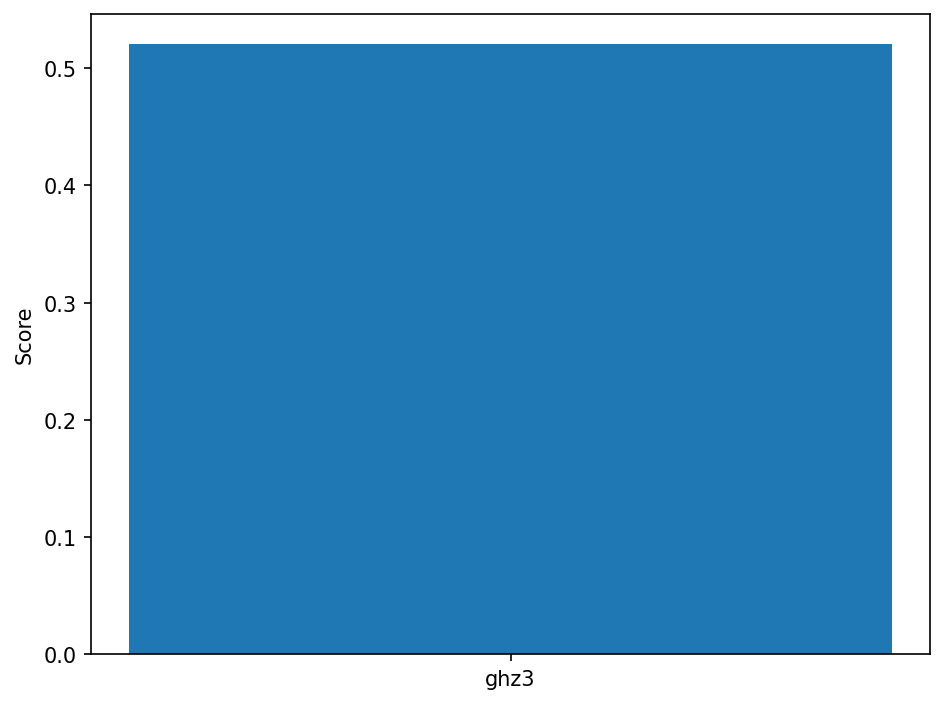

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.rochester.fake_rochester.FakeRochesterV2'> CIRCUIT_NAME: hsim3 COUNTS : {'111': 34, '011': 87, '001': 105, '101': 105, '010': 175, '000': 120, '100': 199, '110': 175} ; SCORE = 0.7911132760733925


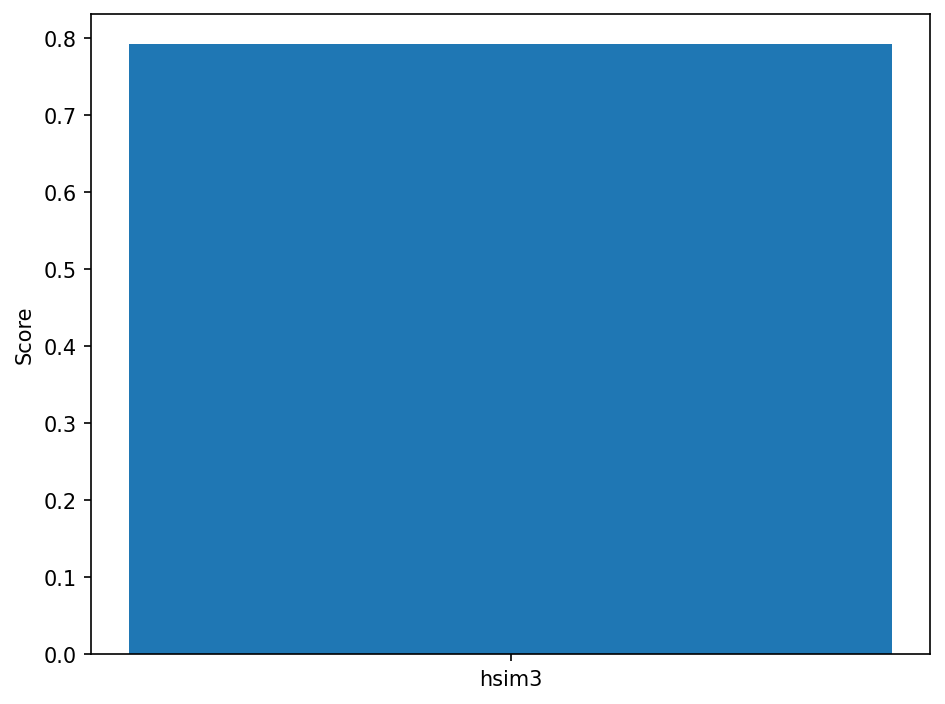

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.rochester.fake_rochester.FakeRochesterV2'> CIRCUIT_NAME: marmin_bell_3 COUNTS : {'111': 34, '011': 87, '001': 105, '101': 105, '010': 175, '000': 120, '100': 199, '110': 175} ; SCORE = 0.4235


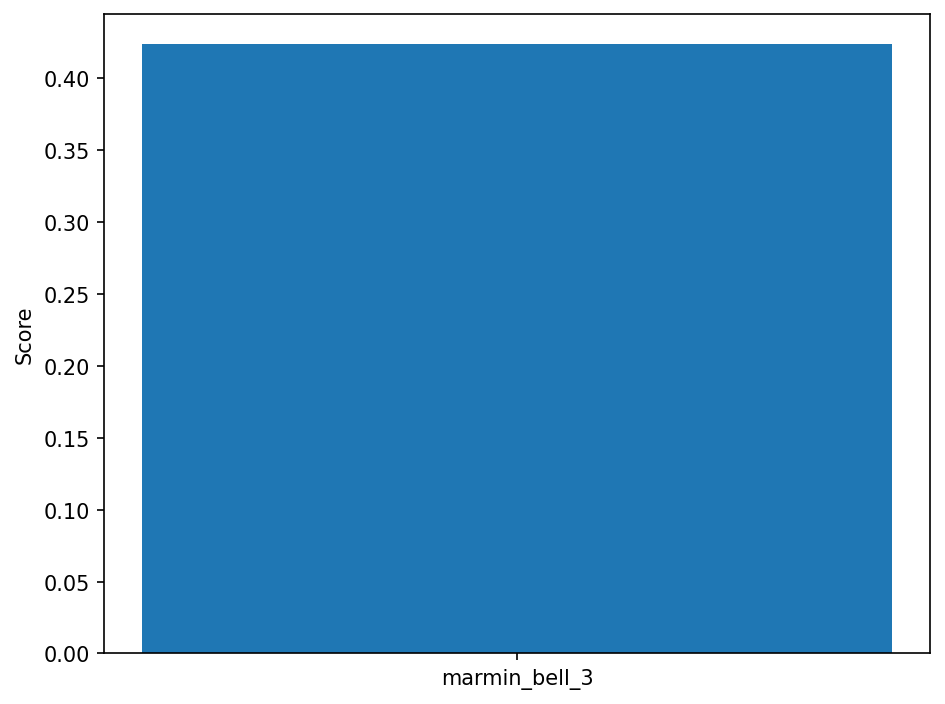

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.rochester.fake_rochester.FakeRochesterV2'> CIRCUIT_NAME: qaoa_swap_proxy3 COUNTS : {'111': 34, '011': 87, '001': 105, '101': 105, '010': 175, '000': 120, '100': 199, '110': 175} ; SCORE = 0.6020004389926259


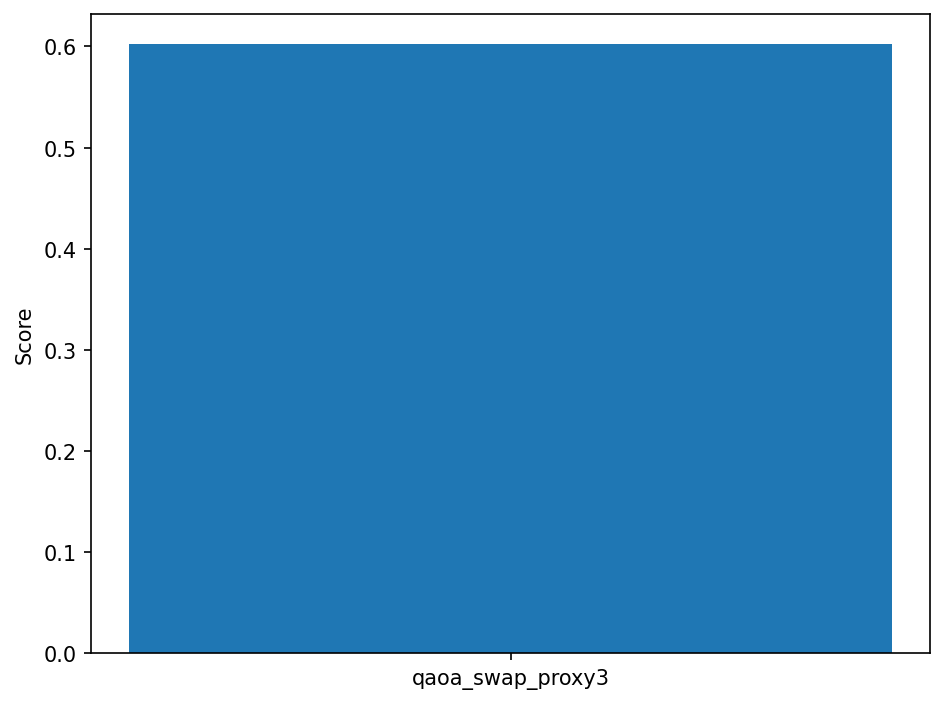

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.rochester.fake_rochester.FakeRochesterV2'> CIRCUIT_NAME: qaoa_vanilla_proxy3 COUNTS : {'111': 34, '011': 87, '001': 105, '101': 105, '010': 175, '000': 120, '100': 199, '110': 175} ; SCORE = 0.6920000155363085


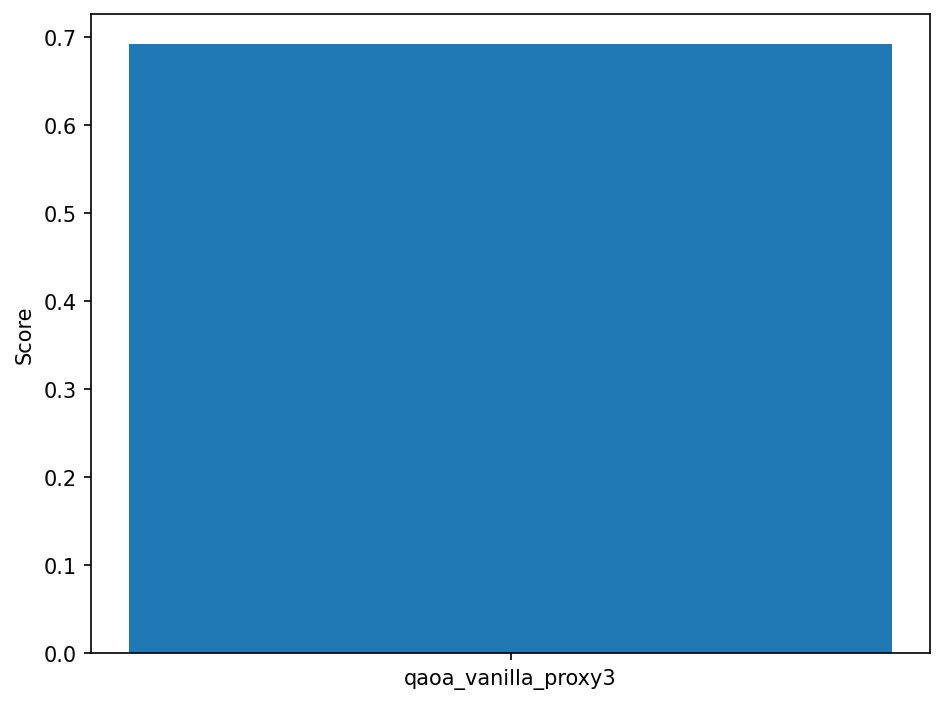

-----------------------------------------------------------


In [74]:
for label,benchmark,backend,job,score in jobs:
    print("USED BACKEND::",backend,"CIRCUIT_NAME:",label,"COUNTS :", counts, "; SCORE =",score)
    supermarq.plotting.plot_results([score], [label])
    print("-----------------------------------------------------------")

In [ ]:
for backend,score in all_scores:
    supermarq.plotting.plot_correlations(benchmark_features,
                                     [device_scores_fake, device_scores],
                                     ["PC", "CD", "Ent", "Liv", "Mea", "Par"],
                                     device_name=["aer_dm_sim","FakeRueschlikon"],
                                     show=True,)